In [1]:
import numpy as np
import matplotlib.pyplot as plt
from src.Luminosity.special_radii import get_photosphere
from src.Calculators.ray_cesare import ray_maker

In [2]:
m = 6
def select_fix(m):
    if m == 4:
        snapshots = [233] #, 254, 263, 277 , 293, 308, 322]
        days = [1]# , 1.2, 1.3, 1.4, 1.56, 1.7, 1.8] 
    if m == 6:
        snapshots = [844, 881, 925, 950] #[844, 881, 882, 898, 925, 950]
        days = [1, 1.1, 1.3, 1.4] #[1, 1.139, 1.143, 1.2, 1.3, 1.4] # t/t_fb
        const = 0.05
        beginning = 1200
    num_array = beginning * np.ones(len(snapshots))
    for i in range(1,len(num_array)):
            num_array[i] = int(1.5 * num_array[i-1])
    return snapshots, days, num_array

In [3]:
fixes, days, num_array = select_fix(m)

In [ ]:
test = num_array/days

In [5]:
photosphere = []
photo_mean = np.zeros(len(fixes))
for idx in range(0,1):
        rays_T, rays_den, rays, radii = ray_maker(fixes[idx], m, int(num_array[idx]))
        for i in range(len(rays_T)):
                _, _, photo = get_photosphere(rays_T, rays_den, radii)
                photosphere.append(photo)
                photo_mean[idx] = np.mean(np.array(photosphere[i]))

In [6]:
Rsol_to_cm = 6.957e10
idx = np.argmin(np.abs(photo_mean[0]-radii))
print((radii[idx+1]-radii[idx])/Rsol_to_cm)

2.88575797400168


In [7]:
np.shape(photosphere)

(192, 192)

In [9]:
for idx in range(0,1):
    spacing = np.zeros(len(rays_T))
    for i in range(len(rays_T)):
        ph = photosphere[idx][i]
        i_photo = np.argmin(np.abs(ph-radii))
        spacing[i] = (radii[idx+1]-radii[idx])/Rsol_to_cm

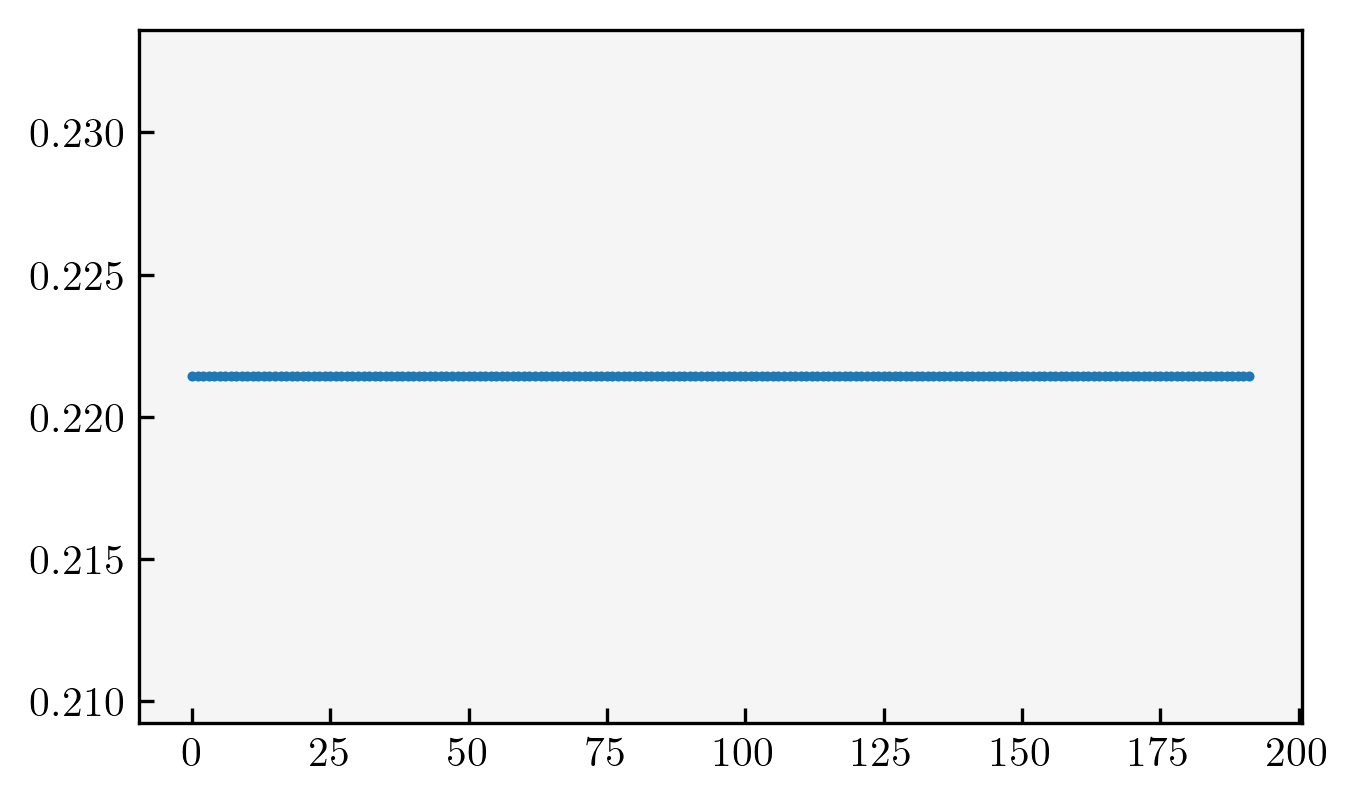

In [11]:
plt.scatter(np.arange(192), spacing, s = 2)

In [ ]:
plt.plot(days,num_array, '-o')
print(num_array)